# Homework -1

## Load, clean and explore a dataset of your choice with Python

#### Importing packages

In [540]:
# Call necessary libraries
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import date, datetime
import re

#### Identifying path to data and compiling .csv files

In [541]:
# Establishing path to data folder. Define dataframe as all_data and concatenating files in data folder
df = pd.read_csv("./data/avocado.csv")

files = [file for file in os.listdir('./data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./data/"+file)
    all_data = pd.concat([all_data, df])

all_data.to_csv("all_data.csv", index=False)


#### Read in updated dataframe

In [542]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Timeframe
0,0.0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,NaN
1,1.0,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,NaN
2,2.0,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,NaN
3,3.0,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,NaN
4,4.0,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,NaN


In [564]:
all_data.tail()

,Date,AveragePrice,Total Volume,type,region,Season
21268,6/21/2020,1.58,408166.67,organic,West,summer
21269,7/12/2020,1.50,34669.26,organic,West Tex/New Mexico,summer
21270,7/5/2020,1.47,39661.54,organic,West Tex/New Mexico,summer
21271,6/28/2020,1.47,44358.33,organic,West Tex/New Mexico,summer
21272,6/21/2020,1.44,40888.91,organic,West Tex/New Mexico,summer


In [543]:
# Interested in viewing the data in a different way
all_data.describe

<bound method NDFrame.describe of        Unnamed: 0        Date  AveragePrice  Total Volume      4046  \
0             0.0  12/27/2015          1.33      64236.62   1036.74   
1             1.0  12/20/2015          1.35      54876.98    674.28   
2             2.0  12/13/2015          0.93     118220.22    794.70   
3             3.0   12/6/2015          1.08      78992.15   1132.00   
4             4.0  11/29/2015          1.28      51039.60    941.48   
...           ...         ...           ...           ...       ...   
21268         NaN   6/21/2020          1.58     408166.67  29156.32   
21269         NaN   7/12/2020          1.50      34669.26    884.79   
21270         NaN    7/5/2020          1.47      39661.54    831.84   
21271         NaN   6/28/2020          1.47      44358.33    779.84   
21272         NaN   6/21/2020          1.44      40888.91   1063.53   

            4225     4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0       54454.85    48.16     8696.

In [544]:
# Use columns.to_list to isolate headers to identify relevant columns
all_data.columns.to_list()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Timeframe']

#### Clean data frame

In [545]:
# Use the .drop to clean data showing relevant columns
all_data = all_data.drop(['4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Timeframe', 'year', 'Unnamed: 0'], axis=1)

In [546]:
# Verify desired headers
all_data.columns.to_list()

['Date', 'AveragePrice', 'Total Volume', 'type', 'region']

In [547]:
# Set AveragePrice and Total Volume to integers
type('all_data')
all_data['AveragePrice'] = pd.to_numeric(all_data['AveragePrice'])
all_data['Total Volume'] = pd.to_numeric(all_data['Total Volume'])

In [548]:
# Identify unique values contained within 'region'
all_data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico',
       'Baltimore/Washington', 'Buffalo/Rochester', 'Cincinnati/Dayton',
       'Dallas/Ft. Worth', 'Grand Rapids', 'Great Lakes',
      

In [549]:
# Filter 'region' to Total U.S. rows
all_data[all_data.region == 'Total U.S.']

,Date,AveragePrice,Total Volume,type,region
18300,1/6/2020,0.97,46310705.72,conventional,Total U.S.
18354,1/6/2020,1.40,1661847.67,organic,Total U.S.
18408,1/12/2020,0.97,46524778.83,conventional,Total U.S.
18462,1/12/2020,1.41,1960946.80,organic,Total U.S.
18516,1/19/2020,0.93,48534972.05,conventional,Total U.S.
18570,1/19/2020,1.35,2058102.35,organic,Total U.S.
18624,1/26/2020,1.01,43938472.70,conventional,Total U.S.
18678,1/26/2020,1.44,1701009.45,organic,Total U.S.
18732,2/2/2020,0.85,63428864.75,conventional,Total U.S.
18786,2/2/2020,1.39,1880070.18,organic,Total U.S.


#### Additon of Season column to data frame

In [550]:
# Create variable to use as values to build dictionary
seasons = ["winter", "winter", "spring", "spring", "spring", "summer", "summer", "summer", "fall", "fall", "fall", "winter"]

In [551]:
# Define dictionary
month_to_season = dict(zip(range(1,13), seasons))

In [552]:
# Verify key and values are correct
month_to_season

{1: 'winter',
 2: 'winter',
 3: 'spring',
 4: 'spring',
 5: 'spring',
 6: 'summer',
 7: 'summer',
 8: 'summer',
 9: 'fall',
 10: 'fall',
 11: 'fall',
 12: 'winter'}

In [553]:
# Bring in the season based on month_to_season invoking .apply using lambda
all_data['Season'] = list(map(lambda d: month_to_season[int(d.split("/")[0])], all_data['Date']))

#### Group data by Season and type for Average Unit Price and Total Volume

In [554]:
#Interested in seeing "average_price" and "total_volume" grouped by season
all_data.groupby(['Season']).mean()

,AveragePrice,Total Volume
Season,,
fall,1.536147,7.025703e+05
spring,1.352102,1.008237e+06
summer,1.445846,9.284478e+05
winter,1.288988,9.527508e+05


In [555]:
#Interested in seeing "average_price" and "total_volume" grouped by season
all_data.groupby(['Season']).sum()

,AveragePrice,Total Volume
Season,,
fall,6470.25,2.959226e+09
spring,8469.57,6.315596e+09
summer,7023.92,4.510399e+09
winter,7655.30,5.658387e+09


In [556]:
all_data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [562]:
all_data.groupby(all_data['type']).mean()

,AveragePrice,Total Volume
type,,
conventional,1.150306,1.772233e+06
organic,1.634422,5.553347e+04


#### Visualizations

In [558]:
# Isolate 'Total U.S.' values
#all_data = all_data[all_data.region == 'Total U.S.']

In [559]:
#Box Plot Comparison of Average Price by Type
Organic = all_data.loc[all_data.type == 'organic']['AveragePrice']
Conventional = all_data.loc[all_data.type ==  'conventional']['AveragePrice']

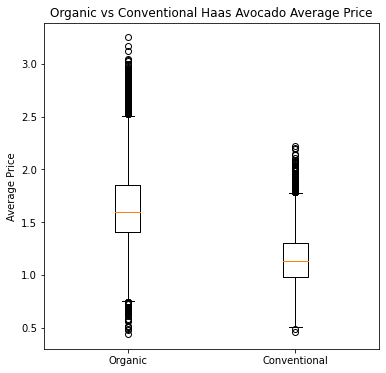

In [560]:
plt.figure(figsize=(6,6))
labels = ['Organic', 'Conventional']
plt.boxplot([Organic, Conventional], labels=labels)

plt.title('Organic vs Conventional Haas Avocado Average Price')
plt.ylabel('Average Price')
plt.show()

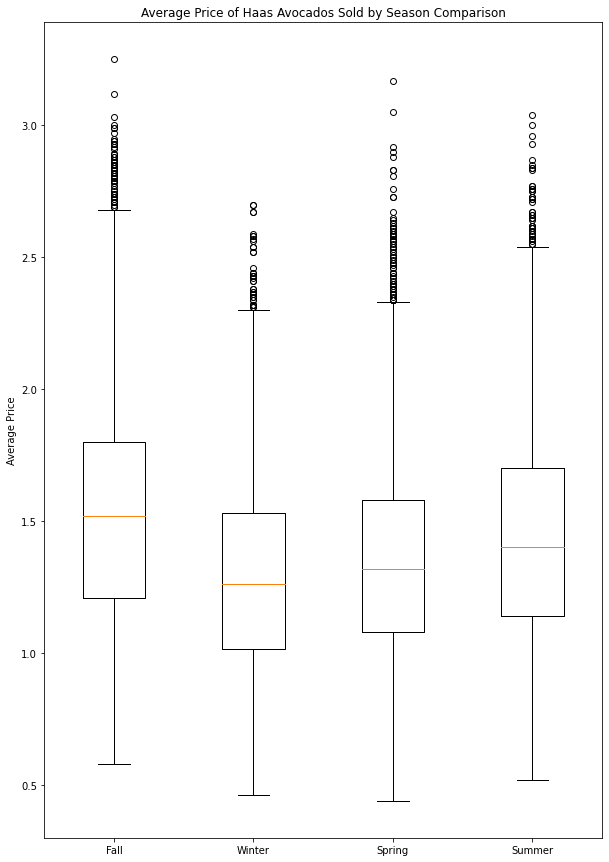

In [563]:
# Box and whisker of 'Total Volume' by season
plt.figure(figsize=(10,15))
Fall = all_data.loc[all_data.Season=='fall']['AveragePrice']
Winter = all_data.loc[all_data.Season=='winter']['AveragePrice']
Spring = all_data.loc[all_data.Season=='spring']['AveragePrice']
Summer = all_data.loc[all_data.Season=='summer']['AveragePrice']

labels = ['Fall','Winter','Spring','Summer']
plt.boxplot([Fall,Winter,Spring,Summer], labels=labels)
plt.title('Average Price of Haas Avocados Sold by Season Comparison')
plt.ylabel('Average Price')
plt.show()